# Determining minimum-cutsets of DAGs

In [119]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm    # For node colour map 

In [120]:
# A - adjacency matrix (node and edges)
# an entire row of 1s indicates arrows away FROM the node, 
# an entire column of 1s indicates arrows TO the node
A = np.array([[0,1,0,0,0,0],
              [0,0,1,1,0,0],
              [0,0,0,0,1,0],
              [0,0,0,0,1,0],
              [0,0,0,0,0,1],
              [0,0,0,0,0,0]])

# F - feature list (node type)
# row indicates node 
# col indicates node type
F = np.array([[0,1,0],
              [0,0,1],
              [1,0,0],
              [1,0,0],
              [1,0,0],
              [1,0,0]])

In [123]:
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

G = nx.DiGraph()
G.add_edge('x','b', capacity = 1.0)
G.add_edge('b','d', capacity = 1.0)
G.add_edge('b','e', capacity = 1.0)
G.add_edge('d','f', capacity = 1.0)
G.add_edge('e','f', capacity = 1.0)

G.add_edge('f','g', capacity = 1.0)
G.add_edge('g','h', capacity = 1.0)
G.add_edge('h','j', capacity = 1.0)
G.add_edge('g','i', capacity = 1.0)
G.add_edge('i','j', capacity = 1.0)
G.add_edge('j','y', capacity = 1.0)

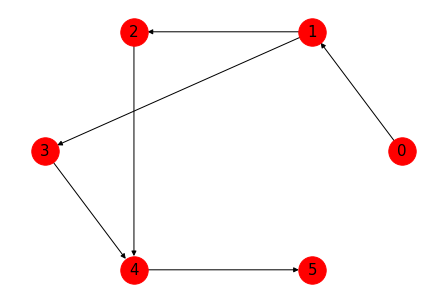

In [124]:
# visualise graph
pos = nx.circular_layout(G)
nx.draw_circular(G, node_size=750)
labels = {i for i in G.nodes()}
nx.draw_networkx_labels(G, pos, font_size=15)
plt.show()

In [136]:
# Get all paths from source (DAG start) to sink (DAG end)
# one of these must be successful for the system to be successful
sys_success_paths = []
for path in nx.all_simple_paths(G, source=min(G.nodes()), target=max(G.nodes())):
    print(path)
    sys_success_paths.append(path)
    

[0, 1, 2, 4, 5]
[0, 1, 3, 4, 5]


In [137]:
sys_success_paths

[[0, 1, 2, 4, 5], [0, 1, 3, 4, 5]]

In [140]:
sys_success_paths[0]

[0, 1, 2, 4, 5]

In [141]:
bool_test = np.array([0,1,0,1,0,1])

In [144]:
bool_test[sys_success_paths[0]]

array([0, 1, 0, 0, 1])

In [143]:
np.take(sys_success_paths[0], bool_test)

array([0, 1, 0, 1, 0, 1])

In [177]:
# emulate system simulation
# can make the path lookup matrix operation rather than a loop
iters = 10
count_success = 0
result_output_str = []
for iter in range(iters):
    result_output_str.append(f'Iteration {iter}')
    system_bool = np.random.randint(0,2,A.shape[0])
    result_output_str.append(f'    Path\tSuccessful Nodes\tSuccess')
    for path in sys_success_paths:
        path_bool = system_bool[path]
        result_output_str.append(f'{path_bool}\t\t{(sum(path_bool)/len(path_bool))*100:0.2f}%\t\t{sum(path_bool) == len(path_bool)}')
        if sum(path_bool) == len(path_bool):
            count_success += 1

# print results
print(f'Total Success: {count_success}/{iters*len(sys_success_paths)} ({(count_success/(iters*len(sys_success_paths)))*100:0.2f}%)')
print(f'\n\t\t--- RESULTS ---')
for result_output in result_output_str:
    print(result_output)

Total Success: 2/20 (10.00%)

		--- RESULTS ---
Iteration 0
    Path	Successful Nodes	Success
[0 1 1 0 0]		40.00%		False
[0 1 1 0 0]		40.00%		False
Iteration 1
    Path	Successful Nodes	Success
[1 0 0 1 0]		40.00%		False
[1 0 0 1 0]		40.00%		False
Iteration 2
    Path	Successful Nodes	Success
[0 0 1 1 0]		40.00%		False
[0 0 0 1 0]		20.00%		False
Iteration 3
    Path	Successful Nodes	Success
[0 1 1 1 0]		60.00%		False
[0 1 0 1 0]		40.00%		False
Iteration 4
    Path	Successful Nodes	Success
[0 1 1 1 0]		60.00%		False
[0 1 1 1 0]		60.00%		False
Iteration 5
    Path	Successful Nodes	Success
[0 0 1 1 0]		40.00%		False
[0 0 0 1 0]		20.00%		False
Iteration 6
    Path	Successful Nodes	Success
[0 0 1 0 0]		20.00%		False
[0 0 1 0 0]		20.00%		False
Iteration 7
    Path	Successful Nodes	Success
[0 1 1 0 1]		60.00%		False
[0 1 1 0 1]		60.00%		False
Iteration 8
    Path	Successful Nodes	Success
[1 1 1 1 1]		100.00%		True
[1 1 1 1 1]		100.00%		True
Iteration 9
    Path	Successful Nodes	Success
[0 0 0

In [118]:
# list(nx.bridges(G))
# list(nx.all_node_cuts(G))
# nx.minimum_node_cut(G, 'x', 'y')